In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Step 2: Load the Dataset
# The Olist dataset consists of multiple CSV files. Start with the main ones:
orders_df = pd.read_csv('olist_orders_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
customers_df = pd.read_csv('olist_customers_dataset.csv')

In [5]:
# Step 3: Initial Data Exploration
# Check the first few rows of each dataset
print("Orders Dataset Shape:", orders_df.shape)
orders_df.head()

# Check basic information about the dataset
orders_df.info()

# Check for missing values
orders_df.isnull().sum()

Orders Dataset Shape: (99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
# Step 4: Define Your Target Variable
# For this project, we could predict:
# 1. Product price
# 2. Shipping time (delivery date - purchase date)
# 3. Order total value

# Example: Let's merge order_items with orders to get total value per order
order_analysis = orders_df.merge(order_items_df, on='order_id')

In [8]:
# Step 5: Feature Engineering
# Convert date columns to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Calculate delivery time in days
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - 
                            orders_df['order_purchase_timestamp']).dt.total_seconds() / (24*60*60)

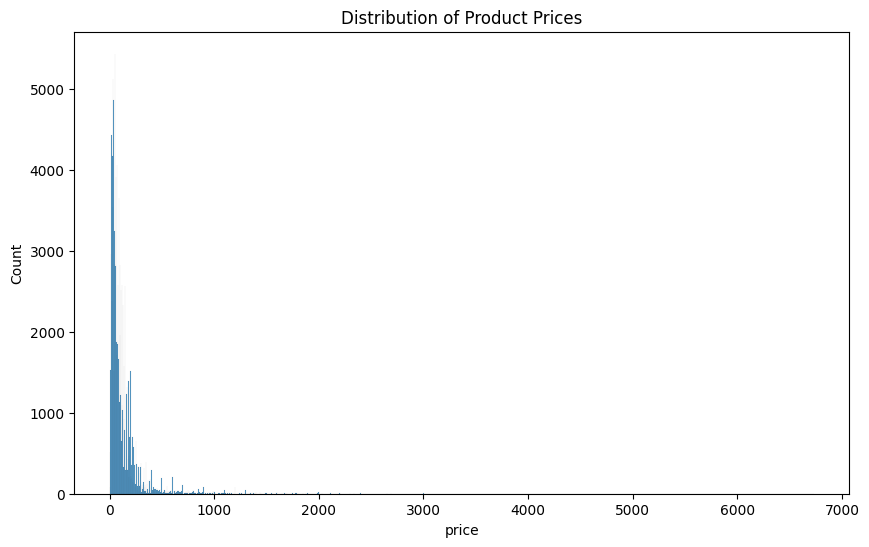

In [10]:
# Step 6: Basic Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=order_items_df, x='price')
plt.title('Distribution of Product Prices')
plt.show()

In [11]:
# Step 7: Prepare Data for Linear Regression
# Example: Predicting price based on freight_value and other features
X = order_items_df[['freight_value']]  # Add more features as needed
y = order_items_df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Step 8: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 29694.463434164194
R² Score: 0.1804588299213843
